In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [68]:
log_path = Path(f"/home/kafka/repos/thesis/logs_g5_mixed")
MACHINE = "g5.4xlarge"
BATCH_SIZE = 128
DATASET = "cifar10"

#model_name = f"resnet18_bs_{BATCH_SIZE}"
model_name = f"resnet18_mixed_bs_{BATCH_SIZE}"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_rn18_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_16tw_1vw_pid"
naive_model_rn34_path_prefix = f"resnet34_pretrained_bs{BATCH_SIZE}_16tw_1vw_pid"
naive_model_path_prefix = f"resnet50_pretrained_bs{BATCH_SIZE}_16tw_1vw_pid"
naive_model_8w_path_prefix = f"resnet50_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet50_pretrained_bs{BATCH_SIZE}_16tw_1vw_1pf_pid"


In [69]:
#cifar10 21 epochs
#if DATASET == "cifar10":
#    pids = [
#        4089, 5302, 6481, # naive seq
#        7976, #7974, 7975, 7976, naive makespan
#        10912, #10910, 10911, 10912, naive MPS
#        14496, #14491, 14496, 14496 shared
#        21028, #21020, 21025, 21028 shared MPS
#    ]
#
#    trace_pids = [
#        4089, 7976, 10912, # naive
#        14392, 20919, # shared
#
#    ]

#cifar10 - 11 epochs
if DATASET == "cifar10":
    pids = [
        2428, 2973, 3380, # naive sequential
        3805, 4054, 4165, # naive sequential + DALI
        4281, # 4279, 4280, 4281, naive makespan
        5626, # 5624, 5625, 5626, naive makespan + DALI
        6135, # 6133, 6134, 6135, naive MPS
        7422, # 7420, 7421, 7422, naive MPS + DALI
        7902, # 7897, 7901, 7902, shared
        8810, # 8808, 8809, 8810, shared + DALI
        9353, # 9345, 9350, 9353, shared MPS
        10454, # 10452,10453, 10454, shared MPS + DALI
    ]

    trace_pids = [
        2428,
        3805,
        4281,
        6135,
        7422,
        7825,
        8752,
        9259,
        10398
    ]

if DATASET == "imagenet_10pct":
    pids = [
        7994, #7992, 7993, 7994 naive makespan
        2074, #2072, 2073, 2074 naive MPS
        3341, #3336, 3339, 3341 shared
        5346 #5341, 5344, 5346 shared MPS
    ]
    trace_pids = [
        7994, 2074, 3248, 5257,
    ]

In [19]:
measurements_cifar10 = {}
measurements_imagenet_10pct = {}

In [70]:
if DATASET == "imagenet_10pct":
    naive = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")
    measurements_imagenet_10pct["Naive collocated\n(makespan/last finish time)"] = naive["total_time"].sum()

    naive_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}.csv")
    measurements_imagenet_10pct['Naive collocated (MPS)'] = naive_mps["total_time"].sum()

    shared = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[2]}.csv")
    measurements_imagenet_10pct["Shared"] = shared["total_time"].iloc[1] + (shared["total_time"].iloc[-1]*9) - 16

    shared_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[3]}.csv")
    measurements_imagenet_10pct["Shared MPS"] = shared_mps["total_time"].iloc[1] + (shared_mps["total_time"].iloc[-1]*9) - 16
    

if DATASET == "cifar10":
    naive_seq_1 = pd.read_csv(train_path / model_name / f"{naive_model_rn18_path_prefix}_{pids[0]}.csv")
    naive_seq_2 = pd.read_csv(train_path / model_name / f"{naive_model_rn34_path_prefix}_{pids[1]}.csv")
    naive_seq_3 = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
    measurements_cifar10["Naive sequential"] = naive_seq_1["total_time"].sum() + naive_seq_2["total_time"].sum() + naive_seq_3["total_time"].sum()

    naive_seq_dali_1 = pd.read_csv(train_path / model_name / f"{naive_model_rn18_path_prefix}_{pids[3]}.csv")
    naive_seq_dali_2 = pd.read_csv(train_path / model_name / f"{naive_model_rn34_path_prefix}_{pids[4]}.csv")
    naive_seq_dali_3 = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[5]}.csv")
    measurements_cifar10["Naive sequential + DALI"] = naive_seq_dali_1["total_time"].sum() + naive_seq_dali_2["total_time"].sum() + naive_seq_dali_3["total_time"].sum()

    #naive_col = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
    naive_col = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[6]}.csv")
    measurements_cifar10["Naive collocated\n(makespan/last finish time)"] = naive_col["total_time"].sum()

    naive_col_dali = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[7]}.csv")
    measurements_cifar10["Naive collocated + DALI"] = naive_col_dali["total_time"].sum()

    #naive_col_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
    naive_col_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}.csv")
    measurements_cifar10["Naive collocated (MPS)"] = naive_col_mps["total_time"].sum()

    #naive_col_mps_dali = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}.csv")
    #measurements["Naive MPS + DALI"] = naive_col_mps_dali["total_time"].sum()

    shared = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}.csv")
    measurements_cifar10["Shared"] = shared["total_time"].sum()

    shared_dali = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv")
    measurements_cifar10["Shared + DALI"] = shared_dali["total_time"].sum()

    shared_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}.csv")
    measurements_cifar10["Shared MPS"] = shared_mps["total_time"].sum()

    #shared_mps_dali = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}.csv")
    #measurements["Shared MPS + DALI"] = shared_mps_dali["total_time"].sum()

    

In [31]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

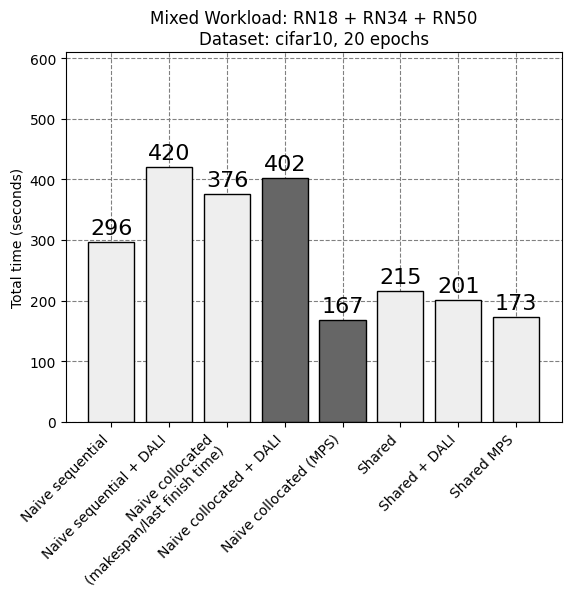

In [271]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#eeeeee', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: cifar10, 20 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,610)
plt.grid(color='gray', linestyle='dashed')
plt.show()


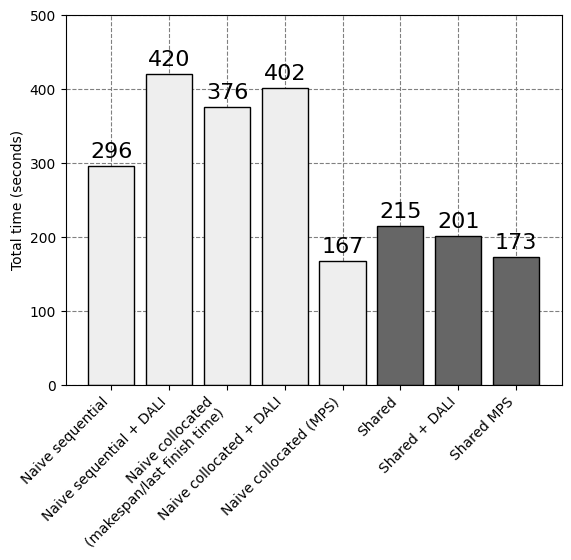

In [272]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#666666', '#666666', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
#plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: cifar10, 10 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,500)
plt.grid(color='gray', linestyle='dashed')
plt.show()


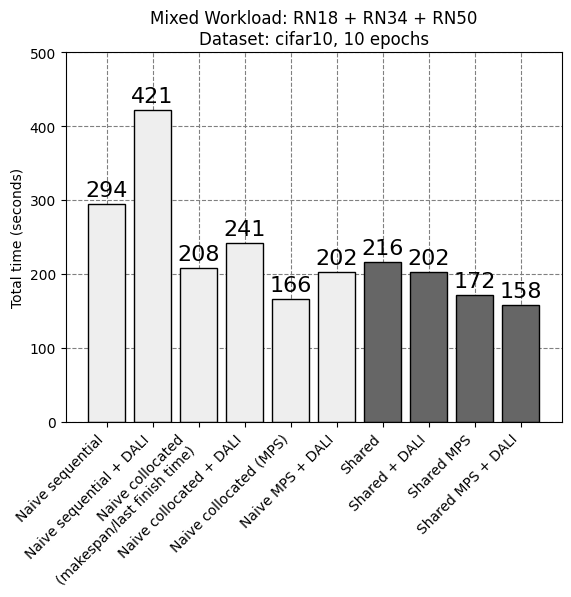

In [52]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#666666', '#666666', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: cifar10, 10 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,500)
plt.grid(color='gray', linestyle='dashed')
plt.show()


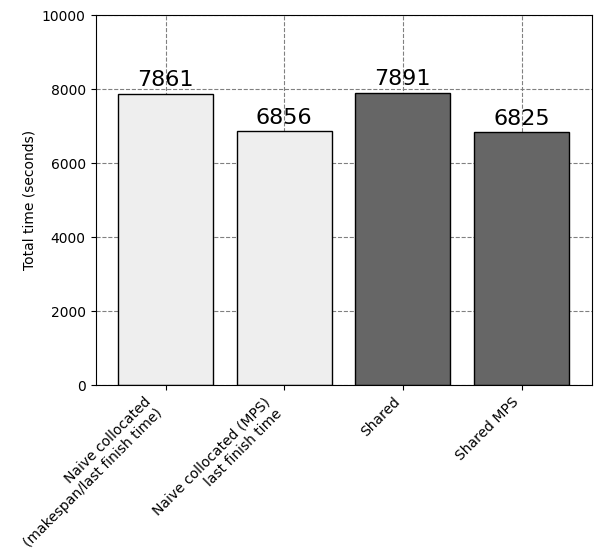

In [202]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
#plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: imagenet_10pct, 10 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,10000)
plt.grid(color='gray', linestyle='dashed')
plt.show()


/tmp/ipykernel_3742/3784647934.py:32: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axs[1].set_ylim(0,10001,2000)


Text(0.5, 0, 'B')

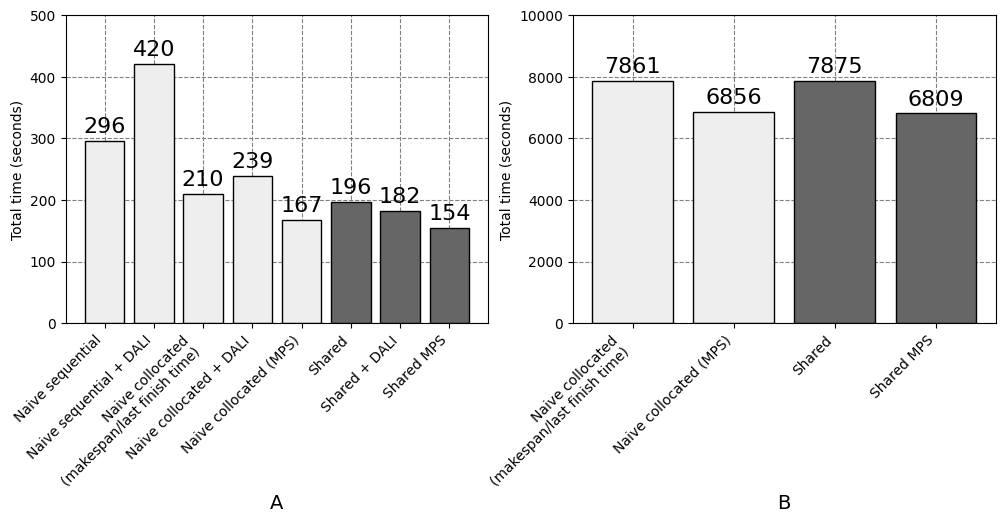

In [71]:
import matplotlib as mpl


xi = np.arange(4)
xc = np.arange(8)
width = 0.1  # the width of the bars
multiplier = -1.5

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=False)
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666",
              "#eeeeee", "#999999", "#666666"]


colors = ['#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#666666', '#666666', '#666666', '#666666']

(y_values,x_values) = zip(*measurements_cifar10.items())
bars = axs[0].bar(y_values, x_values, color=colors, edgecolor="black")
axs[0].bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
#plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: cifar10, 10 epochs')

axs[0].set_ylim(0,500)



colors = ['#eeeeee', '#eeeeee', '#666666', '#666666']

(y_values,x_values) = zip(*measurements_imagenet_10pct.items())
bars = axs[1].bar(y_values, x_values, color=colors, edgecolor="black")
axs[1].bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
axs[1].set_ylim(0,10001,2000)

axs[0].set_ylabel('Total time (seconds)')
axs[1].set_ylabel('Total time (seconds)')
#axs[0].set_xticks(rotation=45, ha="right")
props = {"rotation" : 45, "ha":"right"}
plt.setp(axs[0].get_xticklabels(), **props)
plt.setp(axs[1].get_xticklabels(), **props)

axs[0].grid(color='gray', linestyle='dashed')
axs[1].grid(color='gray', linestyle='dashed')

axs[0].set_xlabel("A", fontsize=14)
axs[1].set_xlabel("B", fontsize=14)

In [72]:
cols = ["running_seconds", "txtpt", "rxtpt", "gputl", "mcutl", "musam", "gusam", "smact", "smocc", "tenso", "drama", "pcitx", "pcirx"]

def get_feat_mean(path, feat="smact"):

    with open(path) as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not (("#Entity" in l) or ("ID" in l))]
        lines = [l.split()[2:] for l in lines]
        lines = [[i+1] + l for i,l in enumerate(lines)]

    df = pd.DataFrame(lines, columns=cols)
    df[feat] = df[feat].astype(float)

    df = df[df[feat] != 0.0]
    return df

In [80]:
if DATASET == "cifar10":
    pids = [
        2428, 2973, 3380, # naive sequential
        3805, 4054, 4165, # naive sequential + DALI
        4281, # 4279, 4280, 4281, naive makespan
        5626, # 5624, 5625, 5626, naive makespan + DALI
        6135, # 6133, 6134, 6135, naive MPS
        7422, # 7420, 7421, 7422, naive MPS + DALI
        7902, # 7897, 7901, 7902, shared
        8810, # 8808, 8809, 8810, shared + DALI
        9353, # 9345, 9350, 9353, shared MPS
        10454, # 10452,10453, 10454, shared MPS + DALI
    ]

    trace_pids = [
        2428,
        3805,
        4281,
        5626,
        6135,
        7422,
        7825,
        8752,
        9259,
        10398
    ]

In [84]:
feat = "smact"

df_naive_sequential = get_feat_mean(train_path / model_name / f"pid_{trace_pids[0]}_dcgm.out", feat)
df_naive_sequential_dali = get_feat_mean(train_path / model_name / f"pid_{trace_pids[1]}_dcgm.out", feat)
df_naive_makespan = get_feat_mean(train_path / model_name / f"pid_{trace_pids[2]}_dcgm.out", feat)
df_naive_makespan_dali = get_feat_mean(train_path / model_name / f"pid_{trace_pids[3]}_dcgm.out", feat)
df_naive_mps = get_feat_mean(train_path / model_name / f"pid_{trace_pids[4]}_dcgm.out", feat)
#df_naive_mps_dali = get_feat_mean(train_path / model_name / f"pid_{trace_pids[5]}_dcgm.out", feat)
df_shared = get_feat_mean(train_mul_path / f"pid_{trace_pids[6]}_dcgm.out", feat)
df_shared_dali = get_feat_mean(train_mul_path / f"pid_{trace_pids[7]}_dcgm.out", feat)
df_shared_mps = get_feat_mean(train_mul_path / f"pid_{trace_pids[8]}_dcgm.out", feat)

In [85]:
dfs = [df_naive_sequential,
       df_naive_sequential_dali,
       df_naive_makespan,
       df_naive_makespan_dali,
       df_naive_mps,
       #df_naive_mps_dali,
       df_shared,
       df_shared_dali,
       df_shared_mps
       ]

In [86]:
suptitles = [
    ['Naive sequential', 'Naive sequential + DALI', ''], 
    ['Naive collocated\n(makespan/last finish time)', 'Naive collocated + DALI', 'Naive collocated (MPS)'], 
    ['Shared', 'Shared + DALI', 'Shared MPS']
]

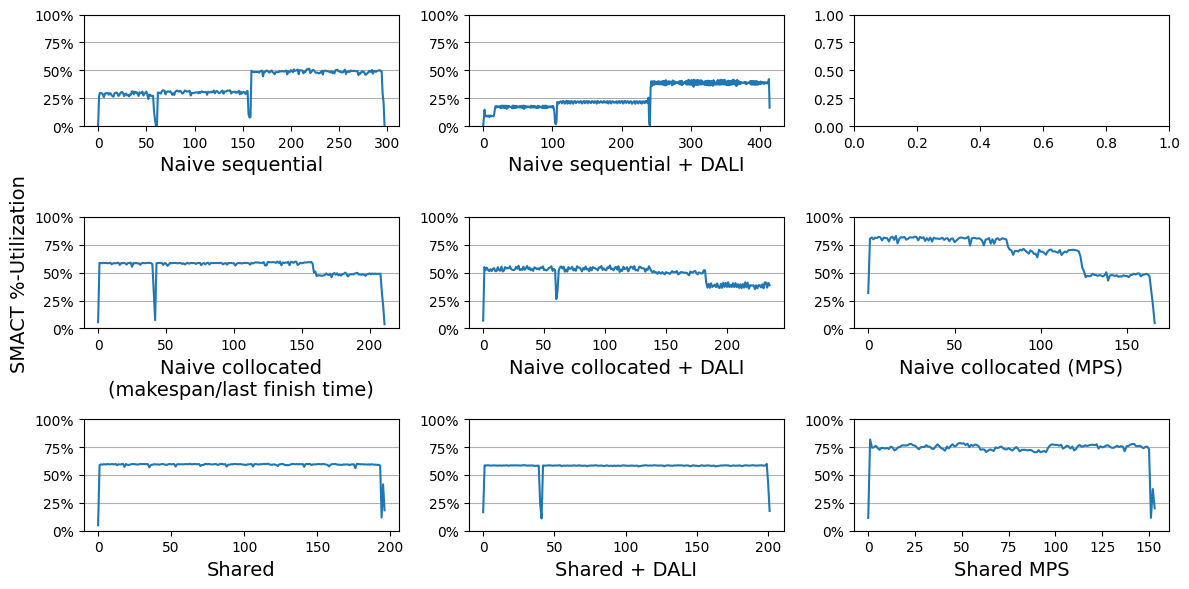

In [88]:
import matplotlib as mpl
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharey=False)
idx = 0

for i in range(3):
    for j in range(3):
        df = dfs[idx].reset_index()["smact"]
        if i == 0 and j == 2:
            continue
        df.plot(ax=axs[i][j])
        fmt = lambda x, pos: '{:.0f}%'.format(x*100, pos)
        axs[i][j].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
        axs[i][j].set_xlabel(f"{suptitles[i][j]}", fontsize=14)
        idx += 1
        axs[i][j].grid(axis="y")
        #axs[i][j].set_xticks([i for i in range(0,301,40)])
        axs[i][j].set_ylim(0,1)

axs[1][0].set_ylabel("SMACT %-Utilization", fontsize=14)
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

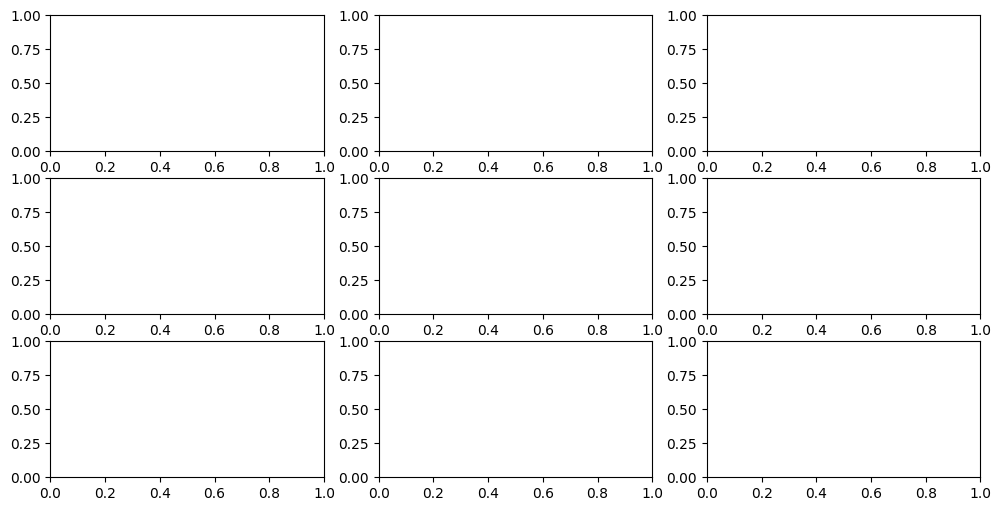

In [87]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharey=False)
idx = 0

for i in range(3):
    for j in range(3):
        df = dfs[idx].reset_index()["smocc"]
        if i == 0 and j == 2:
            continue
        df.plot(ax=axs[i][j])
        fmt = lambda x, pos: '{:.0f}%'.format(x*100, pos)
        axs[i][j].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
        axs[i][j].set_xlabel(f"{suptitles[i][j]}", fontsize=14)
        idx += 1
        axs[i][j].grid(axis="y")
        axs[i][j].set_ylim(0,1)

axs[1][0].set_ylabel("SMOCC %-Utilization", fontsize=14)
plt.tight_layout()
plt.show()

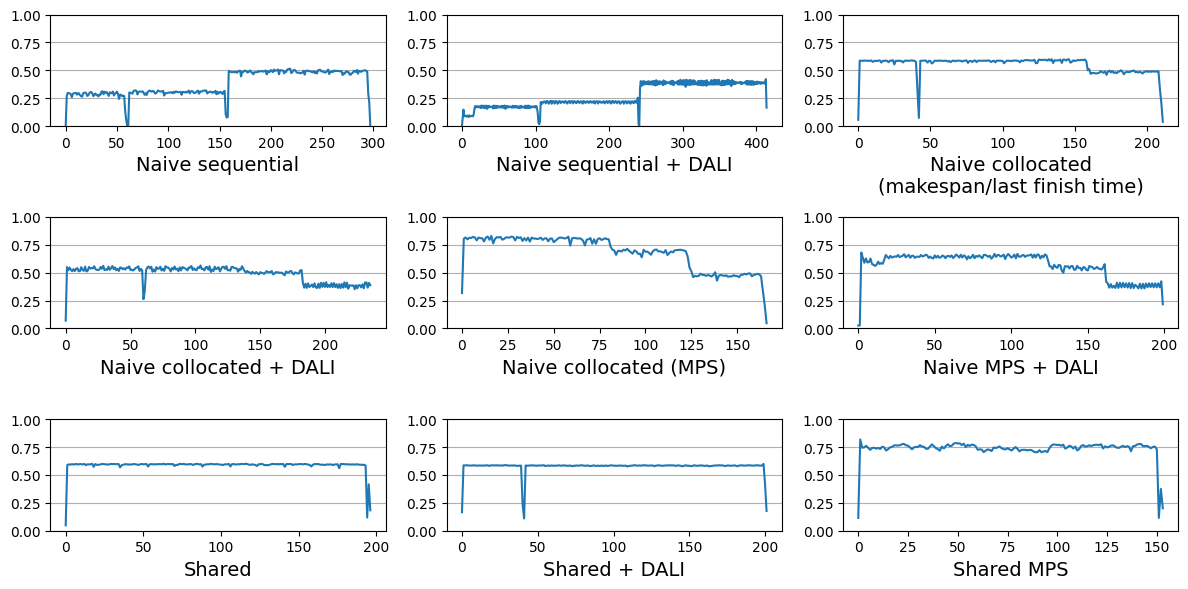

In [105]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharey=False)
idx = 0

for i in range(3):
    for j in range(3):
        df = dfs[idx].reset_index()["smact"]
        
        df.plot(ax=axs[i][j])
        #axs[i][j].set_xlabel(f"{i+1}.{j+1}", fontsize=14)
        axs[i][j].set_xlabel(f"{suptitles[i][j]}", fontsize=14)
        idx += 1
        axs[i][j].grid(axis="y")
        axs[i][j].set_ylim(0,1)

plt.tight_layout()
plt.show()

In [38]:
feat = "smact"

if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(0, 4)]

    mps = [get_feat_mean(train_path / model_name / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(4, 8)]

    shared = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(8, 12)]

    shared_mps = [get_feat_mean(train_mul_path / f"pid_{trace_pids[i]}_dcgm.out", feat) for i in range(12, 16)]

FileNotFoundError: [Errno 2] No such file or directory: '/home/kafka/repos/thesis/logs_g5_mixed/single_runs/imagenet_10pct/resnet18_mixed_bs_128/pid_7994_dcgm.out'